# Lab X. Wrap-Up

## In this lab you will apply the concepts and techniques developed in previous sessions. You are expected to work on the assignments (A1-A4) on your own.
## You are expected to submit the code developed as well as a brief description of your findings and insights for each assigment.
## This lab represents 60% of the total marking of the module




In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /srv/conda/envs/notebook/lib/python3.7/site-packages (0.11.1)


In [5]:
 pip install statsmodels 


Note: you may need to restart the kernel to use updated packages.


In [6]:
import seaborn as sns

In [7]:
# we need this command to remove some warning messages
pd.options.mode.chained_assignment = None  # default='warn'

In [8]:
plt.xkcd()

In [9]:
### Let's load the gapminder dataset
gapminder = pd.read_csv('gapminder.tsv', sep='\t')

In [10]:
gapminder.groupby(['country','continent','year']).count()

lifeExp  pop  gdpPercap
country     continent year                         
Afghanistan Asia      1952        1    1          1
                      1957        1    1          1
                      1962        1    1          1
                      1967        1    1          1
                      1972        1    1          1
...                             ...  ...        ...
Zimbabwe    Africa    1987        1    1          1
                      1992        1    1          1
                      1997        1    1          1
                      2002        1    1          1
                      2007        1    1          1

[1704 rows x 3 columns]

In [11]:
gapminder.groupby(['continent','year']).count()

country  lifeExp  pop  gdpPercap
continent year                                  
Africa    1952       52       52   52         52
          1957       52       52   52         52
          1962       52       52   52         52
          1967       52       52   52         52
          1972       52       52   52         52
          1977       52       52   52         52
          1982       52       52   52         52
          1987       52       52   52         52
          1992       52       52   52         52
          1997       52       52   52         52
          2002       52       52   52         52
          2007       52       52   52         52
Americas  1952       25       25   25         25
          1957       25       25   25         25
          1962       25       25   25         25
          1967       25       25   25         25
          1972       25       25   25         25
          1977       25       25   25         25
          1982       25       25   25         25
          1987       25       25   25         25
          1992       25       25   25         25
          1997       25       25   25         25
          2002       25       25   25         25
          2007       25       25   25         25
Asia      1952       33       33   33         33
          1957       33       33   33         33
          1962       33       33   33         33
          1967       33       33   33         33
          1972       33       33   33         33
          1977       33       33   33         33
          1982       33       33   33         33
          1987       33       33   33         33
          1992       33       33   33         33
          1997       33       33   33         33
          2002       33       33   33         33
          2007       33       33   33         33
Europe    1952       30       30   30         30
          1957       30       30   30         30
          1962       30       30   30         30
          1967       30       30   30         30
          1972       30       30   30         30
          1977       30       30   30         30
          1982       30       30   30         30
          1987       30       30   30         30
          1992       30       30   30         30
          1997       30       30   30         30
          2002       30       30   30         30
          2007       30       30   30         30
Oceania   1952        2        2    2          2
          1957        2        2    2          2
          1962        2        2    2          2
          1967        2        2    2          2
          1972        2        2    2          2
          1977        2        2    2          2
          1982        2        2    2          2
          1987        2        2    2          2
          1992        2        2    2          2
          1997        2        2    2          2
          2002        2        2    2          2
          2007        2        2    2          2

In [12]:
gapminder.sample(10)

,country,continent,year,lifeExp,pop,gdpPercap
1034,Mozambique,Africa,1962,36.161,7788944,556.686354
966,Mauritania,Africa,1982,53.599,1622136,1481.150189
682,Hungary,Europe,2002,72.590,10083313,14843.935560
850,"Korea, Rep.",Asia,2002,77.045,47969150,19233.988180
742,Iraq,Asia,2002,57.046,24001816,4390.717312
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
770,Italy,Europe,1962,69.240,50843200,8243.582340
139,Bolivia,Americas,1987,57.251,6156369,2753.691490
1573,Turkey,Europe,1957,48.079,25670939,2218.754257
858,Kuwait,Asia,1982,71.309,1497494,31354.035730


In [13]:
Asia

NameError: name 'Asia' is not defined

## Assignment 1. Which economies in Asia grew the most in absolute terms ?

 ### You would need to define growth in the first place. Is it the evolution of GDP ? evolution of life expectancy ? population ? a bit of everything ? 

### Hint: refer to the following link for tips on how to plot evolution of quantitative variables:

https://seaborn.pydata.org/tutorial/relational.html#relational-tutorial

### Have a look at the relplot command to produce visualization such as:

https://seaborn.pydata.org/_images/relational_59_0.png

## ANS 

### <u>Growth</u>: We are defining growth as the overall increase in the GDP. GDP is calculated by multiplying GDP per Capita with total population of a country in a given year. 

In [14]:
Asia = gapminder[gapminder['continent']=="Asia"]

In [15]:
df2 = pd.DataFrame(index=Asia.year.unique())

for count in (Asia.country.unique()):
    df1 = Asia[Asia['country']==count]
    df1 = (df1.drop(['country','continent'],axis = 1).sort_values(by='year'))
    df1.set_index('year',inplace = True)
    
    df2[count] = df1['pop']*df1['gdpPercap']
    print(df2[count])
#     Pakistan.set_index('year',inplace = True)
#     Pakistan_GDP =  Pakistan[count]
#     print(Pakistan_GDP.to_frame())
# #     df = df.append(Pakistan_GDP.to_frame())
#     df1 = df1.join(Pakistan_GDP[count].to_frame())




1952    6.567086e+09
1957    7.585449e+09
1962    8.758856e+09
1967    9.648014e+09
1972    9.678553e+09
1977    1.169766e+10
1982    1.259856e+10
1987    1.182099e+10
1992    1.059590e+10
1997    1.412200e+10
2002    1.836341e+10
2007    3.107929e+10
Name: Afghanistan, dtype: float64
1952    1.188461e+09
1957    1.613362e+09
1962    2.191816e+09
1967    2.993238e+09
1972    4.216406e+09
1977    5.751940e+09
1982    7.261180e+09
1987    8.421244e+09
1992    1.007917e+10
1997    1.214601e+10
2002    1.536203e+10
2007    2.111268e+10
Name: Bahrain, dtype: float64
1952    3.208206e+10
1957    3.398532e+10
1962    3.901117e+10
1967    4.530627e+10
1972    4.459489e+10
1977    5.307281e+10
1982    6.300969e+10
1987    7.802857e+10
1992    9.526285e+10
1997    1.199574e+11
2002    1.541591e+11
2007    2.093118e+11
Name: Bangladesh, dtype: float64
1952    1.729534e+09
1957    2.310185e+09
1962    3.023033e+09
1967    3.643124e+09
1972    3.141354e+09
1977    3.663575e+09
1982    4.541489e+09


findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


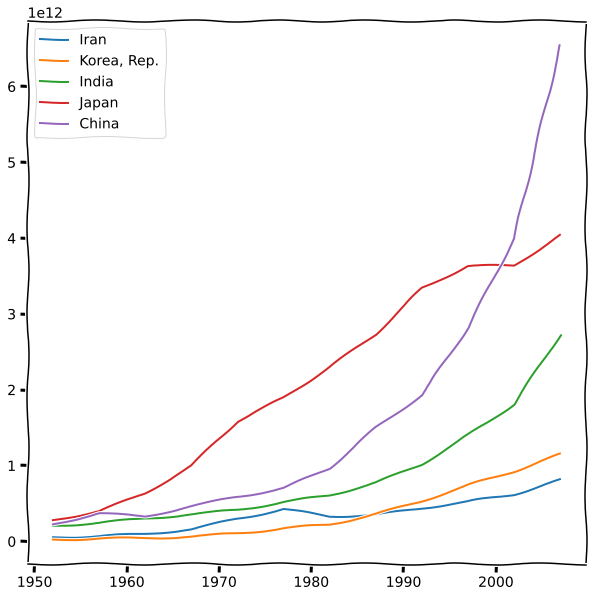

In [16]:
list_top_5 = list(((df2.T[2007].sort_values().tail(5)).to_frame()).index)
df2[list_top_5].plot(kind='line',subplots=False,figsize=(10,10))

Looking at the graph, we can tell that China's economy grew the most in absolute terms. It increased form <i>6.4 billion</i> in 1952 to <i>277.3 billion</i>   in 2007. We can aslo tell that ~1998, China overtook Japan as the leading Asian economy. 


## Assignment 2. Which economies in Asia grew the most in relative terms ?

### You would need to define growth in terms of incremental evolution of GDP and life expectancy
### This approach provides a measure of the effort of each economy to improve its living standards.

#### Hint: you would want to compute deltas (refer to time series example in the lab).

#### Hint:  you would also want to compute cummulative increments (refer to time series example in the lab). 

In [17]:
df = pd.DataFrame(index=Asia.year.unique())

for count in (Asia.country.unique()):
    df1 = Asia[Asia['country']==count]
    df1 = (df1.drop(['country','continent'],axis = 1).sort_values(by='year'))
    df1[count] = df1['pop']*df1['gdpPercap']
    
    df1.set_index('year',inplace = True)
    init_Val = df1[count].iloc[0]
    df1_GDP =  df1[count]/init_Val * 100
#     print(df1_GDP.to_frame())
#     df = df.append(Pakistan_GDP.to_frame())
    df = df.join(df1_GDP)

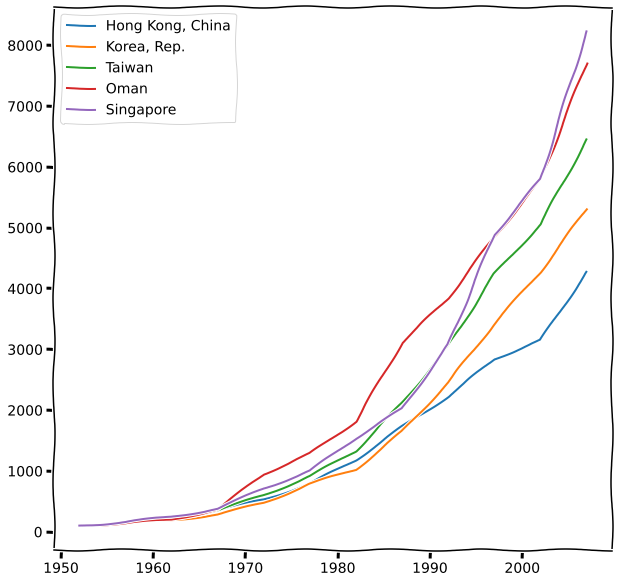

In [18]:
list_top_5 = list(((df.T[2007].sort_values().tail(5)).to_frame()).index)
df[list_top_5].plot(kind='line', subplots=False,figsize=(10,10))

Looking at the graph, we can tell that Singapore's economy grew the most in relative terms. It has a shown a growth of nearly 8000 percent.

## Assignment 3. Is there any relationship between GDP Per Capita and life Expectancy ?

### Hint: consider a regplot visualization
### refer to:

https://seaborn.pydata.org/tutorial/regression.html#functions-to-draw-linear-regression-models

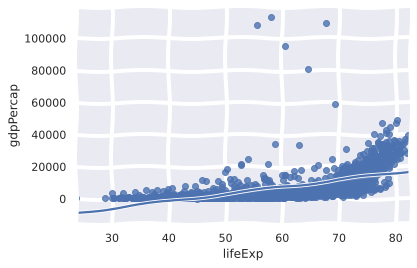

In [19]:
sns.set_theme(color_codes=True)
sns.regplot(x="lifeExp", y="gdpPercap", data=gapminder);

In [241]:
import statsmodels.api as sm
x_train = gapminder.lifeExp.ravel() 
y_train = gapminder.gdpPercap.ravel() 

# X = sm.add_constant(X.ravel())
results = sm.OLS(y_train,x_train).fit()
results.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.459
Model:                            OLS   Adj. R-squared (uncentered):              0.458
Method:                 Least Squares   F-statistic:                              1443.
Date:                Mon, 28 Dec 2020   Prob (F-statistic):                   3.25e-229
Time:                        17:02:22   Log-Likelihood:                         -17930.
No. Observations:                1704   AIC:                                  3.586e+04
Df Residuals:                    1703   BIC:                                  3.587e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           135.9104      3.578     37.985      0.000     128.893     142.928
==============================================================================
Omnibus:                     1716.122   Durbin-Watson:                   0.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           119913.474
Skew:                           4.742   Prob(JB):                         0.00
Kurtosis:                      42.987   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<u>Interpretation</u>

Since p-value for the coefficient is less than 0, we fail to reject the null hypothesis that ththe coefficient is zero. Therefore, we can conclude that there is some association. Precisely, an increase in one unit of life expectancy is associated with in an increase in GDP per capita by 135 units.

### Hint: you can also consider a joint kernel density estimate visualization
### refer to:
https://seaborn.pydata.org/examples/joint_kde.html

## Assignment 4. Has the relationship between GDP Per Capita and life Expectancy changed with time ?

### Tip: consider a FacetGrid visualization (year, gdpPercap, lifeExp)
### refer to:
https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid

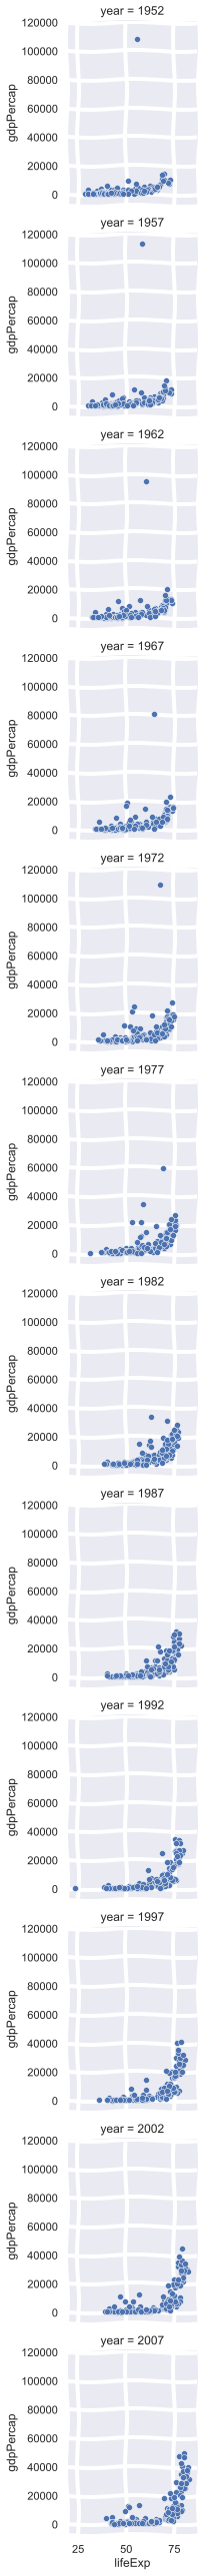

In [240]:
g = sns.FacetGrid(gapminder,row="year")
# g = sns.FacetGrid(tips, col="time",  row="sex")
g.map(sns.scatterplot, "lifeExp","gdpPercap")

Yes, it seems that with time the relationship between the two variables is changing. In 1952, it seems that the relationship is more linear and with time the relation/distribution is approaching an exponenital distribution. 

